## Implement Effect Information (EI) on Ising Model to test whether EI peaks at critical temperature, thereby showing that EI is indeed capturing the most causal transition probability matrix (TPM).
References: Hoel E., "When the Map is Better than the Territory", Entropy, 2017.

- The end goal is TPMs for a variety of temperatures
- TPM's don't require stochastic evolution of an Ising Model, only calculation of state-to-state transition probabilities
- States can only transition to states one bit apart

-- TPMs are currently WAY too big to work with. 20x20 means 2^400 states.

In [211]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline
    
    
## Choose the size of our square lattice
n_nodes = 10*10
n_states = 2**n_nodes
if np.isclose(np.sqrt(n_nodes)%1,0.0) != True:
    print 'ERROR! CODE ONLY ACCEPTS SQUARE LATTICE.'
    sys.exit(1)

## Define a function for getting the 1d index of a 2d lattice w/ PBCs
def get_nn(index,n_nodes):
    n_rows = np.sqrt(n_nodes)
    n_cols = np.sqrt(n_nodes)
    right = index+1
    if right%n_cols == 0:
        right = right-n_cols  # wrap index for pbc
    left = index-1
    if (left+1)%n_cols == 0:
        left = left+n_cols
    up = (index+n_cols)%n_nodes
    down = (index-n_cols)%n_nodes
    return [int(left),int(right),int(up),int(down)]

## Create an iterator objects with all possible states
state_space1 = product([-1,1],repeat=n_nodes)

## Compute the energy difference between states and store as a matrix
TPM = np.zeros((n_states,n_states))
i = 0 # index TPM
#delta_E_hist = []
for state1 in state_space1:
    if i%100 == 0:
        print 'Analyzing State {:5d} of {:5d}'.format(i+1,n_states)
    state_space2 = product([-1,1],repeat=n_nodes) # create a fresh iterator object to compare state1 to all other states
    j = 0 #index TPM
    for state2 in state_space2:
        diff = np.asarray(state2) - np.asarray(state1)
        
        # count how many entries match
        counter = 0
        for index in range(n_nodes):
            if diff[index] == 0:
                counter = counter +1
            else:
                index_of_intest = index
                
        # if the states differ by a single node then the transition probability is non-zero
        if counter == n_nodes-1:
            # get the energy difference between the two states
            neighbors = get_nn(index_of_interest,n_nodes)
            delta_E = 2*state1[index_of_interest]+np.sum(np.asarray(state1)[neighbors])
            #delta_E_hist.append(delta_E)
            TPM[i][j] = delta_E
        
        # otherwise the probability of transition is zero
        else:
            TPM[i][j] = 0
        
        # Store energy difference in TPM
        j = (j+1)%n_states
    i = (i+1)%n_states
    
print 'Done'


ValueError: Maximum allowed dimension exceeded

In [207]:
print TPM

[[ 0. -6. -6.  0. -6.  0.  0.  0. -6.  0.  0.  0.  0.  0.  0.  0.]
 [-2.  0.  0. -2.  0. -2.  0.  0.  0. -6.  0.  0.  0.  0.  0.  0.]
 [-2.  0.  0. -2.  0.  0. -6.  0.  0.  0. -2.  0.  0.  0.  0.  0.]
 [ 0.  2.  2.  0.  0.  0.  0. -2.  0.  0.  0. -2.  0.  0.  0.  0.]
 [-2.  0.  0.  0.  0. -2. -6.  0.  0.  0.  0.  0. -2.  0.  0.  0.]
 [ 0.  2.  0.  0.  2.  0.  0. -2.  0.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0. -2.  0. -2.  0.  0.  2.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  2.  0.  2.  6.  0.  0.  0.  0.  0.  0.  0.  0.  2.]
 [-2.  0.  0.  0.  0.  0.  0.  0.  0. -6. -2.  0. -2.  0.  0.  0.]
 [ 0. -2.  0.  0.  0.  0.  0.  0. -2.  0.  0.  2.  0.  2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0. -2.  0.  0. -2.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0.  6.  2.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.  2.  0.  0.  0.  0. -2. -2.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0.  6.  0.  0.  2.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  2.  0.  2.  0.  0. 

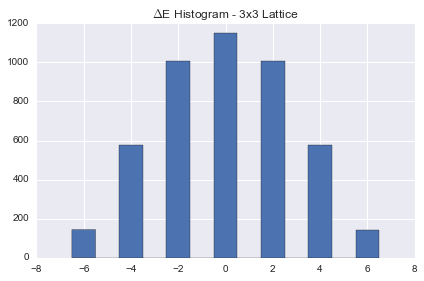

In [198]:
fig, ax = plt.subplots(1,1)
bins=np.arange(-6,8,1)
ax.hist(delta_E_hist,bins=bins,align='left')
ax.set_xticks(bins[:-1],2)
plt.title(r'$\Delta$E Histogram - 3x3 Lattice')
plt.tight_layout()
plt.savefig('/Users/jakehanson/Desktop/temp.pdf')
plt.show()

In [214]:
print np.zeros((1e10,1e10))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


ValueError: array is too big.

0 -16
1 -20
2 -18
3 -8
4 2
5 12
6 14
7 -4
8 -4
9 -10
10 2
11 0
12 -6
13 -6
14 -10
15 0
16 4
17 -2
18 0
19 -4
20 -8
21 -8
22 -2
23 6
24 8
25 12
26 10
27 14
28 10
29 4
30 -8
31 -6
32 -8
33 -10
34 -10
35 -12
36 -16
37 -18
38 -22
39 -28
40 -40
41 -42
42 -48
43 -50
44 -56
45 -54
46 -58
47 -50
48 -46
49 -48
50 -42
51 -50
52 -58
53 -54
54 -54
55 -44
56 -44
57 -38
58 -38
59 -46
60 -50
61 -50
62 -52
63 -56
64 -58
65 -62
66 -58
67 -60
68 -58
69 -66
70 -62
71 -64
72 -70
73 -68
74 -66
75 -70
76 -72
77 -76
78 -86
79 -96
80 -90
81 -102
82 -98
83 -100
84 -98
85 -102
86 -96
87 -98
88 -96
89 -96
90 -90
91 -98
92 -92
93 -94
94 -100
95 -104
96 -110
97 -122
98 -122
99 -118
100 -116
101 -112
102 -114
103 -108
104 -114
105 -118
106 -120
107 -124
108 -128
109 -140
110 -148
111 -150
112 -148
113 -146
114 -146
115 -142
116 -146
117 -154
118 -152
119 -152
120 -152
121 -150
122 -148
123 -146
124 -146
125 -148
126 -150
127 -148
128 -154
129 -152
130 -158
131 -160
132 -164
133 -174
134 -178
135 -188
136 -202
137 -

KeyboardInterrupt: 

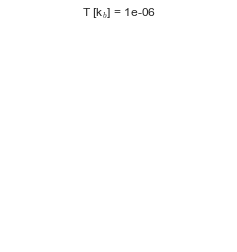

In [149]:
## Lets test out a metropolis algo and write a func to get nearest neighbors
import copy

T = 1e-6  # units of k_b (J = 1)
n_rows = 20
n_cols = 20

# Define function to return nearst neighbors
def get_nn(row_index,col_index):
    left_nn = [(row_index-1)%n_rows,col_index]
    right_nn = [(row_index+1)%n_rows,col_index]
    up_nn = [row_index,(col_index+1)%n_cols]
    down_nn = [row_index,(col_index-1)%n_cols]  
    return [left_nn,right_nn,up_nn,down_nn]

# Define function to output plots
def make_pdf(X,frame_count,T):
    X_image = copy.copy(X)  # Immutable copy of X
    fname = ('_%06d.pdf' % (frame_count))  # assign filename
    plt.imshow(X, cmap='Greys',  interpolation='nearest',vmin=-1,vmax=1)
    plt.xticks([]); plt.yticks([]);
    plt.title(r'T [k$_b$] = ' + str(T))
    plt.savefig('/Users/jakehanson/Desktop/Ising_Plots/plot' + fname)
    plt.cla()
        
        
# Create random initial spin state of -1 and 1
X = np.random.randint(0,2,size=(n_rows,n_cols))
for i in range(n_rows):
    for j in range(n_cols):
        if X[i][j] == 0:
            X[i][j] = -1
        
# Evolve ising model
frame_count = 0
for i in range(400**3):
    # choose node of interest
    rand_row = np.random.randint(0,n_rows)
    rand_col = np.random.randint(0,n_cols)
    
    # get nn's
    neighbors = get_nn(rand_row,rand_col)
    
    # calculate energy
    E = -X[rand_row,rand_col]*(X[tuple(neighbors[0])]+X[tuple(neighbors[1])]+X[tuple(neighbors[2])]+X[tuple(neighbors[3])])

    # decide whether or not to flip
    if E > 0.:
        X[rand_row,rand_col] = -X[rand_row,rand_col]  # majority of spins antialigned means flip
    else:
        r = np.random.random()
        if r <= np.exp(2.*E/T):
            X[rand_row,rand_col] = -X[rand_row,rand_col]  # else we may still flip with high T
            
            
# Generate Sim
    if int(i%100) == 0:
        print frame_count, np.sum(X)
        frame_count = frame_count + 1
        make_pdf(X,frame_count,T)

In [175]:
Z = np.zeros(16)
def get_nn(index,n_nodes):
    n_rows = np.sqrt(n_nodes)
    n_cols = np.sqrt(n_nodes)
    right = index+1
    if right%n_cols == 0:
        right = right-n_cols  # wrap index for pbc
    left = index-1
    if (left+1)%n_cols == 0:
        left = left+n_cols
    up = (index+n_cols)%n_nodes
    down = (index-n_cols)%n_nodes
    return [left,right,up,down]

print Z[get_nn(3,16)]

[ 0.  0.  0.  0.]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


In [178]:
1.0%1

0.0